 Matriz de Confusión Completa (usando split manual):
            setosa  versicolor  virginica
setosa          25           0          0
versicolor       0          24          1
virginica        0           2         23


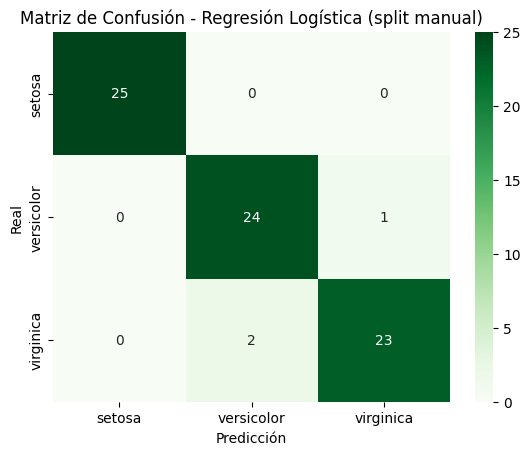


 Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.92      0.96      0.94        25
   virginica       0.96      0.92      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split manual proporcionado
X_train = np.concatenate((X[0:25], X[50:75], X[100:125]))
y_train = np.concatenate((y[0:25], y[50:75], y[100:125]))

X_test = np.concatenate((X[25:50], X[75:100], X[125:150]))
y_test = np.concatenate((y[25:50], y[75:100], y[125:150]))

# Entrenar modelo de regresión logística multiclase
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=target_names, columns=target_names)

print(" Matriz de Confusión Completa (usando split manual):")
print(df_cm)

# Visualización
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Regresión Logística (split manual)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte de clasificación
print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))


In [ ]:
# Calculando curva ROC entre Versicolor y Virginica
vp=0
fp=0
vn=0
fn=0
vpr1 = 0
fpr1 = 0

tpr = [0] * 50
fpr = [0]* 50


for i in range(25, 75):
    tpr[i-25]=vpr1
    fpr[i-25]=fpr1
    if y_pred[i] == 1 and y_test[i] == 1:
        vp += 1
    if y_pred[i] == 2 and y_test[i] == 2:
        vn += 1
    if y_pred[i] == 2 and y_test[i] == 1:
        fp += 1
    if y_pred[i] == 1 and y_test[i] == 2:
        fn += 1
    #print(f"VP: {vp}, FP: {fp}, FN: {fn}, VN: {vn}")

    if (vp + fn)!=0:
      vpr1 = vp/(vp + fn)


    if (fp + vn)!=0:
      fpr1 = fp/(fp + vn)


fpr=np.round(fpr, 2)


tpr = np.sort(tpr)
fpr = np.sort(fpr)

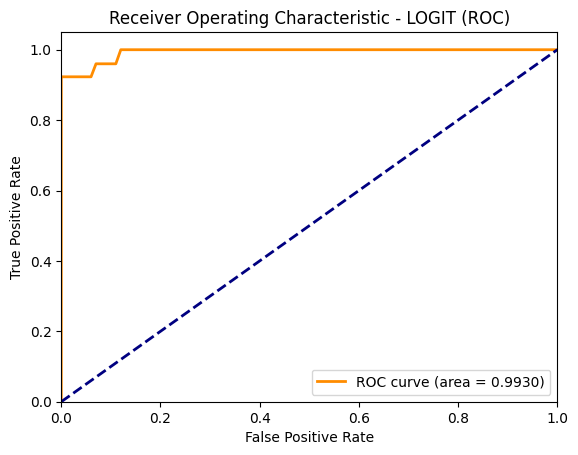

In [ ]:
# Graficar la curva ROC
from sklearn.metrics import roc_curve, auc

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LOGIT (ROC)')
plt.legend(loc="lower right")
plt.show()